# Worksheet 7 - Classification (Part II)

### Lecture and Tutorial Learning Goals:

After completing this week's lecture and tutorial work, you will be able to:

* Describe what a test data set is and how it is used in classification.
* Using R, evaluate classification accuracy using a test data set and appropriate metrics.
* Using R, execute cross validation in R to choose the number of neighbours.
* Identify when it is necessary to scale variables before classification and do this using R
* In a dataset with > 2 attributes, perform k-nearest neighbour classification in R using the `caret` package to predict the class of a test dataset.
* Describe advantages and disadvantages of the k-nearest neighbour classification algorithm.

This worksheet covers parts of [Chapter 7](https://ubc-dsci.github.io/introduction-to-datascience/classification-continued.html) of the online textbook. You should read this chapter before attempting the worksheet.

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(caret)
source('tests_worksheet_07.R')
source('cleanup_worksheet_07.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift


Attaching package: ‘testthat’

The following object is masked from ‘package:dplyr’:

    matches

The following object is masked from ‘package:purrr’:

    is_null



**Question 0.1** Multiple Choice: 
<br> {points: 1}

Before applying k-nearest neighbour to a classification task, we need to scale the data. What is the purpose of this step?

A. To help speed up the knn algorithm. 

B. To convert all data observations to numeric values. 

C. To ensure all data observations will be on a comparable scale and contribute equal shares to the calculation of the distance between points.

D. None of the above. 

*Assign your answer to an object called `answer1`.*

*Note: we typically **standardize** (i.e., scale **and** center) the data before doing classification. For the K-nearest neighbour algorithm specifically, centering has no effect. But it doesn't hurt, and can help with other predictive data analyses, so we will do it below.*

In [2]:
# Make sure the correct answer is an uppercase letter. 
# Surround your answer with quotation marks.
# Replace the fail() with your answer. 

# your code here
answer1 = 'C'

In [3]:
test_0.1()

[1] "Success!"


## 1. Fruit Data Example - (Part II)
**Question 1.0** Multiple Choice: 
<br> {points: 1}

Load the file, `fruit_data.csv`, into your notebook. 

`mutate()` the `fruit_name` column such that it is a *factor*.

*Assign your data to an object called `fruit_data`.*

In [4]:
# your code here
fruit_data=read_csv('data/fruit_data.csv') %>%
mutate(fruit_name=as.factor(fruit_name))

Parsed with column specification:
cols(
  fruit_label = col_double(),
  fruit_name = col_character(),
  fruit_subtype = col_character(),
  mass = col_double(),
  width = col_double(),
  height = col_double(),
  color_score = col_double()
)


In [5]:
test_1.0()

[1] "Success!"


Let's take a look at the first six observations in the fruit dataset. Run the cell below.

In [6]:
# Run this cell. 
head(fruit_data)

fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,apple,granny_smith,192,8.4,7.3,0.55
1,apple,granny_smith,180,8.0,6.8,0.59
1,apple,granny_smith,176,7.4,7.2,0.60
2,mandarin,mandarin,86,6.2,4.7,0.80
2,mandarin,mandarin,84,6.0,4.6,0.79
2,mandarin,mandarin,80,5.8,4.3,0.77


Run the cell below, and find the nearest neighbour based on mass and width to the first observation just by looking at the scatterplot (the first observation has been circled for you).

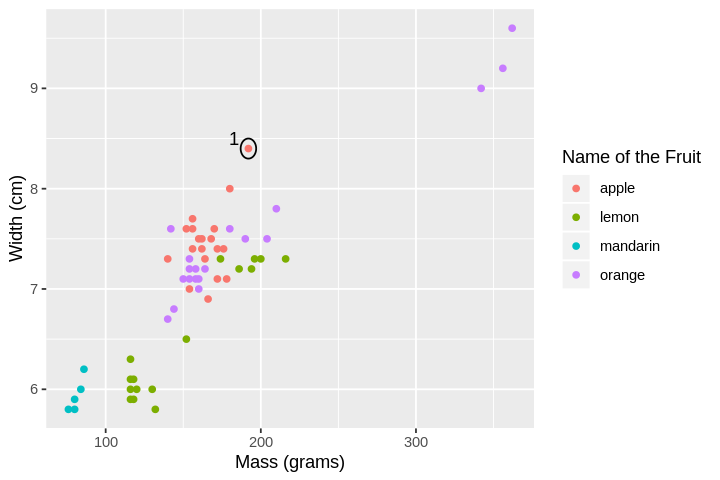

In [7]:
# Run this cell. 
options(repr.plot.width=6, repr.plot.height=4)
point1 <- c(192, 8.4)
point2 <- c(180, 8)
point44 <- c(194, 7.2)

fruit_data %>%  
    ggplot(aes(x=mass, 
               y= width, 
               colour = fruit_name)) +
        labs(x = "Mass (grams)",
             y = "Width (cm)",
            colour = 'Name of the Fruit') +
        geom_point() +
        annotate("path", 
                 x=point1[1] + 5*cos(seq(0,2*pi,length.out=100)),
                 y=point1[2] + 0.1*sin(seq(0,2*pi,length.out=100))) +
        annotate("text", x = 183, y =  8.5, label = "1") 

**Question 1.1** Multiple Choice: 
<br> {points: 1}

Based on the graph generated, what is `fruit_name` of the closest data point to the one circled?

A. apple

B. lemon

C. mandarin 

D. orange

*Assign your answer to an object called `answer1.1`.*

In [8]:
# Make sure the correct answer is an uppercase letter. 
# Surround your answer with quotation marks.
# Replace the fail() with your answer. 

# your code here
answer1.1='A'

In [9]:
test_1.1()

[1] "Success!"


**Question 1.2**
<br> {points: 1}

Using mass and width, calculate the distance between the first observation and the second observation. 

We provide a scaffolding to get you started. 

*Assign your answer to an object called `fruit_dist_2`.*

In [10]:
fruit_dist_2 <- fruit_data %>%
   slice(1, 2) %>% # We use slice to get the first two rows of the fruit dataset
   select(mass, width) %>%
   dist()
fruit_dist_2

# your code here
# fail() # No Answer - remove if you provide an answer

         1
2 12.00666

In [11]:
test_1.2()

[1] "Success!"


**Question 1.3**
<br> {points: 1}

Calculate the distance between the first and the the 44th observation in the fruit dataset using the mass and width variables. 

You can see from the data frame output from the cell below that, observation 44 has mass = 194 g and width = 7.2 cm.

*Assign your answer to an object called `fruit_dist_44`.*

fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
4,lemon,spanish_belsan,194,7.2,10.3,0.7


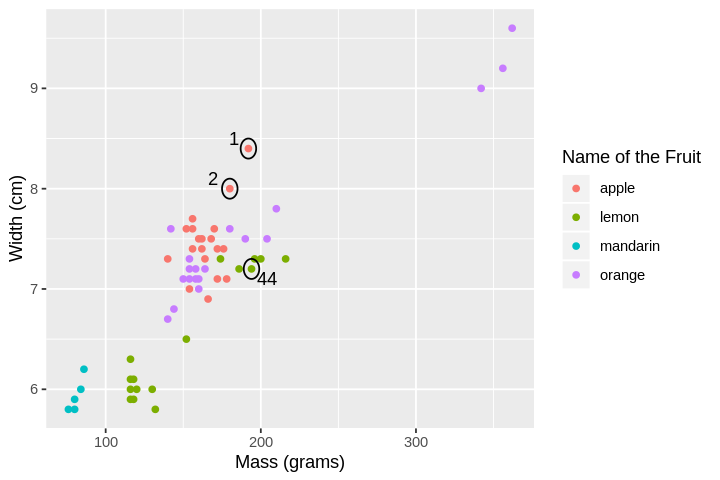

In [12]:
# Run this cell. 

filter(fruit_data, row_number() == 44)

point1 <- c(192, 8.4)
point2 <- c(180, 8)
point44 <- c(194, 7.2)

fruit_data %>%
    ggplot(aes(x = mass, 
               y = width, 
               colour = fruit_name)) +
        labs(x = "Mass (grams)",
             y = "Width (cm)",
            colour = 'Name of the Fruit') +
        geom_point() +
        annotate("path", 
                 x=point1[1] + 5*cos(seq(0,2*pi,length.out=100)),
                 y=point1[2] + 0.1*sin(seq(0,2*pi,length.out=100))) +
        annotate("text", x = 183, y =  8.5, label = "1") +
        annotate("path",
                 x=point2[1] + 5*cos(seq(0,2*pi,length.out=100)),
                 y=point2[2] + 0.1*sin(seq(0,2*pi,length.out=100))) +
        annotate("text", x = 169, y =  8.1, label = "2") +
        annotate("path",
                 x=point44[1] + 5*cos(seq(0,2*pi,length.out=100)),
                 y=point44[2]+0.1*sin(seq(0,2*pi,length.out=100))) +
        annotate("text", x = 204, y =  7.1, label = "44") 

In [13]:
# your code here
fruit_dist_44=fruit_data %>%
    slice(1,44) %>%
    select(mass, width) %>%
    dist()
fruit_dist_44

         1
2 2.332381

In [14]:
test_1.3()

[1] "Success!"


What do you notice about your answers from **Question 1.2 & 1.3** that you just calculated? Is it what you would expect given the scatter plot above? Why or why not? Discuss with your neighbour. 

*Hint: Look at where the observations are on the scatterplot in the cell above this question, and what might happen if we changed grams into kilograms to measure the mass?*


**Question 1.4** 
<br> {points: 1}

The distance between the first and second observation is 12.01 and the distance between the first and 44th observation is 2.33. By the formula, observation 1 and 44 are closer, however, if we look at the scatterplot the distance of the first observation to the second observation appears closer than to the 44th observation. 

Which of the following statements is correct?

A. A difference of 12 g in mass between observation 1 and 2 is large compared to a difference of 1.2 cm in width between observation 1 and 44. Consequently, mass will drive the classification results, and width will have less of an effect. Hence, our distance calculation reflects that.

B. If we measured mass in kilograms, then we’d get different classification results. 

C. We should standardize the data so that all variables will be on a comparable scale. 

D. All of the above. 

*Assign your answer to an object called `answer1.4`.*

In [15]:
# Make sure the correct answer is an uppercase letter. 
# Surround your answer with quotation marks.
# Replace the fail() with your answer. 

# your code here
answer1.4='D'

In [16]:
test_1.4()

[1] "Success!"


**Question 1.5**
<br> {points: 1}

Scale all the variables of the fruit dataset and save them as columns in your data table. 

Save the dataset object and call it `fruit_data_scaled`. Make sure to name the new columns `scaled_*` where `*` is the old column name (e.g. `scaled_mass`)

In [17]:
# Example scaffolding: 
# mutate(scaled_height = scale(height, center = TRUE))

# your code here
fruit_data_scaled = mutate(fruit_data, scaled_height = scale(height, center = TRUE),
                          scaled_color_score = scale(color_score, center = TRUE),
                          scaled_width = scale(width, center = TRUE),
                          scaled_mass = scale(mass, center = TRUE))
head(fruit_data_scaled)

fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score,scaled_height,scaled_color_score,scaled_width,scaled_mass
<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
1,apple,granny_smith,192,8.4,7.3,0.55,-0.2889166,-2.76981970,1.5850841,0.5249358
1,apple,granny_smith,180,8.0,6.8,0.59,-0.6562889,-2.24937587,1.0954508,0.3068287
1,apple,granny_smith,176,7.4,7.2,0.60,-0.3623910,-2.11926491,0.3610008,0.2341263
2,mandarin,mandarin,86,6.2,4.7,0.80,-2.1992529,0.48295423,-1.1078991,-1.4016772
2,mandarin,mandarin,84,6.0,4.6,0.79,-2.2727273,0.35284327,-1.3527158,-1.4380284
2,mandarin,mandarin,80,5.8,4.3,0.77,-2.4931508,0.09262136,-1.5975324,-1.5107308


In [18]:
test_1.5()

[1] "Success!"


**Question 1.6**
<br> {points: 1}

Let's repeat **Question 1.2 and 1.3** with the scaled variables:

- calculate the distance with the scaled mass and width variables between observations 1 and 2
- calculate the distances with the scaled mass and width variables between observations 1 and 44 

After you do this, think about how these distances compared to the distances you computed in **Question 1.2 and 1.3** for the same points.

*Assign your answers to objects called `distance_2` and `distance_44` respectively.*

In [19]:
# your code here
distance_2=fruit_data_scaled %>%
   slice(1, 2) %>% # We use slice to get the first two rows of the fruit dataset
   select(scaled_mass, scaled_width) %>%
   dist()
distance_44=fruit_data_scaled %>%
   slice(1, 44) %>% # We use slice to get the first two rows of the fruit dataset
   select(scaled_mass, scaled_width) %>%
   dist()
distance_2
distance_44

          1
2 0.5360145

        1
2 1.46935

In [20]:
test_1.6()

[1] "Success!"


## Randomness and Setting Seeds

The remaining material in the worksheet uses functions from the `caret` library, many of which make the use of randomness (for many purposes: resolving ties in the nearest neighbour vote, splitting the data, balancing, etc). In order to ensure that the steps in the worksheet are reproducible, we need to set a *seed*, i.e., a numerical "starting value," which determines the sequence of random numbers R will generate.

Below in many cells we have included a call to `set.seed`. **Do not remove these lines of code**; they are necessary to make sure the autotesting code functions properly.

> *Optional extra info for those who are curious:* the reason we have `set.seed` in so many places is that Jupyter notebooks are organized into cells that can be run out of order. Since things can be run out of order, the exact sequence of random values that is used in each cell is hard to determine, which makes autotesting really difficult.  We had two options: either enforce that you only ever run the code by hitting "Restart & Run All" to ensure that we get the same values of randomness each time, or put `set.seed` in a lot of places (we chose the latter). One drawback of calling `set.seed` everywhere is that the numbers that will be generated won't really be random. For the purposes of teaching and learning, that is fine here. But in a typical data analysis, you should really **only call `set.seed` once at the beginning of the analysis, so that your random numbers are actually reasonably random.**

## 2. Splitting the data into a training and test set

Next, we will be partitioning the data into a training (75%) and testing (25%) set using the `caret` package. We will put this test set away in a lock box and not touch it again until we have found the best k-nn classifier we can make using the training set. We will use the variable `fruit_name` as our class label. 


**Question 2.0**
<br> {points: 1}

To do this we first use the `createDataPartition` function to get the row numbers of the data we should include in our training set. Name the object you create `training_rows`.

In [21]:
# Set the seed. Don't remove this!
set.seed(3456) 

# Randomly take 75% of the data in the training set. 
# This will be proportional to the different number of fruit names in the dataset.

# your code here
# ?createDataPartition
training_rows = fruit_data %>% 
    select(fruit_name) %>%
    unlist() %>%
    createDataPartition(p = 0.75, list = FALSE)
head(training_rows)

Resample1
1
3
4
6
7
8


In [22]:
test_2.0()

[1] "Success!"


**Question 2.1.0** 
<br> {points: 1}

Next we use the `slice` function to get the rows from the original data frame that match the ones we have in `training_rows`.  The goal is to create one object for the training data (`training_set`) and one for the testing data (`testing_set`) using the rows that we have designated via `createDataPartition`.

Use the scaffolding provided. Name the two subsets of data `training_set` and `testing_set`.

In [23]:
#... <- fruit_data %>% slice(training_rows)
#... <- ... %>% ...(-training_rows)

# your code here
training_set <- fruit_data %>% slice(training_rows)
testing_set <- fruit_data %>% slice(-training_rows)

In [24]:
test_2.1.0()

[1] "Success!"


**Question 2.1.1** 
<br> {points: 1}

We should perform a data transformation to scale and centre our predictors. We should create the scaling transformer using only the training data. This ensures that our test data does not influence any aspect of our model training. Once we have created the scaling transformer, we can then apply it separately to both the training and test data sets.

Use the scaffolding provided. Name the two datasets `training_set` and `testing_set`.

In [25]:
# scale_transformer <- preProcess(..., method = c("center", "scale")) 
# ... <- predict(..., training_set)
# ... <- predict(..., testing_set)

# your code here
scale_transformer <- preProcess(training_set, method = c("center", "scale")) 
training_set <- predict(scale_transformer, training_set)
testing_set <- predict(scale_transformer, testing_set)

In [26]:
test_2.1.1()

[1] "Success!"


### Using cross-validation to choose k

Let's start with a simple classifier, one that uses only `color_score` and `mass` as predictors. `fruit_name` should be the class label. As we build this simple classifier from the training set, let's use cross-validation to choose the best $k$.

**Question 2.2**
<br> {points: 1}

We now need to take our training data and specify what columns are going to be the predictors and which are going to the class labels. Name the predictors `X_simple` and the class labels `Y_fruit`.

> Note: We will be using the `train()` function from the `caret` package, which requires that the `x` argument a data frame object and the `y` argument a numeric or factor vector. In other words, `X_simple` should be a data frame and `Y_fruit` should be a vector.

In [27]:
# your code here
X_simple = training_set %>% 
  select(mass, color_score) %>% 
  data.frame()
Y_fruit = training_set %>% 
  select(fruit_name) %>% 
  unlist()
head(X_simple)
head(Y_fruit)

mass,color_score
<dbl>,<dbl>
0.4015976,-2.8120525
0.1333800,-2.1493762
-1.3753441,0.5013290
-1.4759257,0.1037232
-1.4759257,0.6338643
-1.5429801,0.6338643


fruit_name1 fruit_name2 fruit_name3 fruit_name4 fruit_name5 fruit_name6 
      apple       apple    mandarin    mandarin    mandarin    mandarin 
Levels: apple lemon mandarin orange

In [28]:
test_2.2()

[1] "Success!"


**Question 2.3**
<br> {points: 1}

Next, we need to create a data frame, named `ks`, that contains a single column, named `k`, that holds the k-values we'd like to try out. Let's try the values 1, 3, 5, 7, 9 and 11. 

*Hint - the `c` function is useful for creating vectors, which are what data frame columns are.*

In [29]:
# your code here
k = c(1,3,5,7,9,11)
ks = data.frame(k)
ks

k
<dbl>
1
3
5
7
9
11


In [30]:
test_2.3()

[1] "Success!"


**Question 2.4**
<br> {points: 1}

Next, we use the `trainControl` function. This function passes additional information to the `train` function we use to create our classifier. Here we would like to set the arguments to `method = "cv"` (for cross-validation) and `number = 10` (for 10-fold cross-validation). Name this object `train_control`.

In [31]:
#... <- trainControl(method = ..., ... = 10)

# your code here
train_control <- trainControl(method = "cv", number = 10)

In [32]:
test_2.4()

[1] "Success!"


**Question 2.5**
<br> {points: 1}

Now we create our classifier as we did last week, but to do cross-validation as well (so we can assess classifier accuracy based on each $k$) we supply an additional argument to the `train` function, `trControl`. For that argument, we pass the name of the object we created using the `trainControl` function. Name the classifier `choose_k`.

In [33]:
# Set the seed. Don't remove this!
set.seed(1234) 

# your code here
choose_k = train(X_simple, Y_fruit, method = "knn", tuneGrid=ks, trControl = train_control)
choose_k

k-Nearest Neighbors 

46 samples
 2 predictor
 4 classes: 'apple', 'lemon', 'mandarin', 'orange' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 41, 43, 40, 40, 41, 42, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.9016667  0.8524342
   3  0.9216667  0.8787500
   5  0.9016667  0.8448938
   7  0.8316667  0.7448938
   9  0.7050000  0.5769821
  11  0.6650000  0.5146864

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 3.

In [34]:
test_2.5()

[1] "Success!"


Then to help us choose $k$ it is very useful to visualize the accuracies as we increase $k$. This will help us choose the smallest $k$ with the largest accuracy. To do this, create a line and point plot of accuracy (y-axis) versus $k$ (x-axis). We can get these values from the `results` attribute of the classifier object using the `$` operator. We demonstrate this in the cell below:

In [35]:
# run this cell
k_accuracies <- choose_k$results %>%
                    select(k, Accuracy)
k_accuracies 

k,Accuracy
<dbl>,<dbl>
1,0.9016667
3,0.9216667
5,0.9016667
7,0.8316667
9,0.7050000
11,0.6650000


**Question 2.6**
<br> {points: 1}

Now that we have the accuracy and $k$ values in a data frame, create a **line and point plot** of accuracy (y-axis) versus $k$ (x-axis). Remember to do all the things for making your visualization effective. Name your plot object `choose_k_plot`.

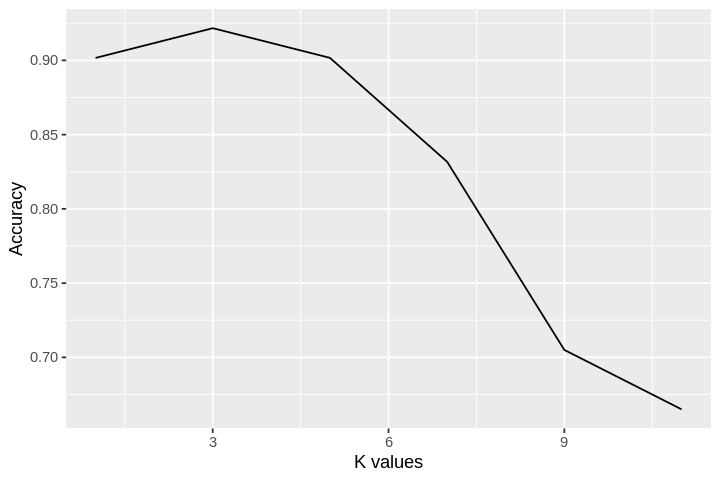

In [49]:
# your code here
choose_k_plot = ggplot(k_accuracies, aes(x=k, y=Accuracy)) +
    geom_line() +
    labs(x="K values", y="Accuracy")
choose_k_plot

In [51]:
test_2.6()

ERROR: Error in choose_k_plot$layers[[2]]: subscript out of bounds


**Question 2.7**
<br> {points: 1}

If we were judging based on the plot of accuracy versus $k$ you created above, which $k$ should we choose? 

Assign the value of $k$ we should choose to a variable named `answer2.7` 

*Note: there may be multiple reasonable answers. Just pick one of these, any one will suffice.*

In [52]:
# your code here
# fail() # No Answer - remove if you provide an answer
answer2.7 = '3'

In [53]:
test_2.7()

[1] "Success!"


**Question 2.8**
<br> {points: 1}

What is the cross-validation accuracy for the optimal $k$? 

Assign the value of the cross-validation accuracy for the optimal $k$ to a variable named `answer2.8`

In [54]:
# your code here
# fail() # No Answer - remove if you provide an answer
answer2.8 = 0.9216667

In [55]:
test_2.8()

[1] "Success!"


## 3. Training error as a diagnostic tool

Is this the best we can do with our classifier? Maybe, or maybe not. To get a hint we can use the training error as a diagnostic to tell us if we are underfitting and could afford to make our model more complex, say by including additional predictors.

**Question 3.0**
<br> {points: 1}

Create another simple classifier object (same columns as the classifier above) using the `train` function that does not use cross-validation, and only a single $k$ value of 3. Name it `simple`.

In [61]:
# Set the seed. Don't remove this!
set.seed(3456)

# your code here
k = c(3)
simple = train(X_simple, Y_fruit, method = "knn", tuneGrid=data.frame(k))
simple

k-Nearest Neighbors 

46 samples
 2 predictor
 4 classes: 'apple', 'lemon', 'mandarin', 'orange' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 46, 46, 46, 46, 46, 46, ... 
Resampling results:

  Accuracy   Kappa    
  0.7874672  0.6933023

Tuning parameter 'k' was held constant at a value of 3

In [62]:
test_3.0()

[1] "Success!"


**Question 3.1**
<br> {points: 1}

Use the `simple` classifier to predict labels for all the observations in the training set (`X_simple`). Name the predictions `training_pred`.

In [64]:
# Set the seed. Don't remove this!
set.seed(3456)

# ... <- predict(..., ...)

# your code here
training_pred <- predict(simple, X_simple)
head(training_pred)

[1] apple    apple    mandarin mandarin mandarin mandarin
Levels: apple lemon mandarin orange

In [65]:
test_3.1()

[1] "Success!"


**Question 3.2**
<br> {points: 1}

Use the `confusionMatrix` function to obtain the training accuracy. The `confusionMatrix` function takes two arguments, the predictions and the true class labels.

Name the object output `training_results`.

In [69]:
#... <- confusionMatrix(..., Y_fruit)
# your code here
training_results = confusionMatrix(data = training_pred, reference = Y_fruit)
training_results

Confusion Matrix and Statistics

          Reference
Prediction apple lemon mandarin orange
  apple       14     1        0      0
  lemon        1    11        0      1
  mandarin     0     0        4      0
  orange       0     0        0     14

Overall Statistics
                                         
               Accuracy : 0.9348         
                 95% CI : (0.821, 0.9863)
    No Information Rate : 0.3261         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9085         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: apple Class: lemon Class: mandarin Class: orange
Sensitivity                0.9333       0.9167         1.00000        0.9333
Specificity                0.9677       0.9412         1.00000        1.0000
Pos Pred Value             0.9333       0.8462         1.00000        1.0000
Neg Pred Value         

In [70]:
test_3.2()

[1] "Success!"


**Question 3.3**
<br> {points: 1}

From the output of the `confusionMatrix` function what is the training accuracy? Give the answer to at least 3 decimal places.

Assign the value of the training accuracy to a variable named answer3.3

In [71]:
# your code here

answer3.3 = 0.9348

In [72]:
test_3.3()

[1] "Success!"


## 4. Improving the classifier beyond changing k

As long as the training accuracy is not 1 (or very close to it) we may be able to further improve the classifier by adding predictors. This is not a guarantee, but something worth trying. When we do this, we also need to re-choose $k$ again, as the optimal $k$ may change with a different number of predictors.

**Question 4.0**
<br> {points: 1}

Create a new classifer called `complex` that uses `mass`, `width`, `height` and `color_score` as predictors. Again, try the values 1, 3, 5, 7, 9 and 11 for $k$ and use 10-fold cross validation.

In [ ]:
# Set the seed. Don't remove this!
set.seed(4567)

# your code here

# complex = 
# complex

In [ ]:
test_4.0()

**Question 4.1**
<br> {points: 1}

- Get the accuracy and  $k$  values from the classifier, and name it `k_accuracies_again`. Use the scaffolding provided below. 
- Create a line and point plot of `Accuracy` (vertical axis) versus `k`  (horizontal axis). Remember to do all the things for making your visualization effective. Name your plot object `choose_k_again_plot`.

In [ ]:
#... <- complex$... %>% select(..., Accuracy)
#choose_k_again_plot <- ggplot(..., aes(..., ...)) +
#                          geom_line() +
#                          ...()


# your code here
fail() # No Answer - remove if you provide an answer
choose_k_again_plot

In [ ]:
test_4.1()

**Question 4.2**
<br> {points: 1}

From the plot of accuracy versus $k$ you created above, which $k$ should we choose for this more complex classifier?

Assign the value of  k  we should choose to a variable named `answer4.2`

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer
answer4.2

In [ ]:
test_4.2()

**Question 4.3**
<br> {points: 1}

What is the cross-validation accuracy for the optimal $k$ for this more complex classifier?

Assign the value of the cross-validation accuracy for the optimal $k$ to a variable named `answer4.3`

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer
answer4.3

In [ ]:
test_4.3()

**Question 4.4**
<br> {points: 1}

Did increasing the classifier complexity improve the cross-validation accuracy? 

Answer by assigning the value of `"True"` or `"False"` to a variable named `answer4.4`

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer
answer4.4

In [ ]:
test_4.4()

## 5. Assessing test accuracy

How good is our model? Assessing the accuracy score on a test data set that was never used to choose our classifier is the only way to know. Let's do that!

**Question 5.0**
<br> {points: 1}

Now that we have chosen the optimal model, re-train your classifier on the entire training data set (i.e., do not use cross-validation) with the "settings" that made it an optimal model (here $k$ and the number of predictors). Name your classifier object `final_classifier`.

In [ ]:
# Set the seed. Don't remove this!
set.seed(4567)

#final_k = data.frame(k = ...)
#... <- train(x = ..., y = Y_fruit, method = "knn", tuneGrid = final_k)

# your code here
fail() # No Answer - remove if you provide an answer
final_classifier

In [ ]:
test_5.0()

**Question 5.1**
<br> {points: 1}

Now use the `final_classifier` to predict the labels for the test set, and then calculate the test accuracy. Name the output from the `confusionMatrix` function `test_results`.

In [ ]:
# Set the seed. Don't remove this!
set.seed(4567)

#X_test <- testing_set %>% 
#    select(...) %>% 
#    data.frame()
#Y_test <- testing_set %>% 
#    select(...) %>% 
#    unlist()
#test_pred <- ...(final_classifier, X_test)
#... <- confusionMatrix(test_pred, ...)


# your code here
fail() # No Answer - remove if you provide an answer
test_results

In [ ]:
test_5.1()

**Question 5.2**
<br> {points: 1}

What is the test accuracy for the final classifier?

Assign the value of the test accuracy for the final classifier to a variable named `answer5.2`

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer
answer5.2

In [ ]:
test_5.2()